In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from  tensorflow import keras 
sys.path.append("..") # Adds higher directory to python modules path.
import brevis
from brevis import branches
from brevis import evaluate

In [2]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [18]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = tf.keras.models.load_model('./models/alexNetv6_entropy_conv2d.hdf5')
model.summary()
# model.evaluate(test_ds)
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten_evidence,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

Model: "model_2_branched"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 55, 55, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 96)  384         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                   

In [3]:
test_set = brevis.dataset.prepare.test_set(tf.keras.datasets.cifar100.load_data(label_mode="fine"),32,(227,227),include_targets=False,num_outputs = 100)
# model.evaluate(test_ds)

targetsis : False


In [ ]:
# train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)
# plain_model = tf.keras.models.load_model('../models/alexNetv6_logits.hdf5')
# plain_model.evaluate(test_ds)


In [ ]:
model.evaluate(test_ds)

Entropy
----
<hr>


In [20]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [4]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = tf.keras.models.load_model('./models/alexNetv6_entropy_flat.hdf5')
model.summary()
# model.evaluate(test_ds)
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten_evidence,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

Model: "model_branched"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 55, 55, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 96)  384         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                     

In [5]:
# SVM reliability diagram with calibration
def classification(y, prob, bins =10):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    linspace = np.linspace(0,1,num=bins)
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()

import math
    
# SVM reliability diagram with calibration
def cumulativeClassification(y, prob, bins =10, thresholdType = ">="):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    print("max",max(prob))
    linspace = np.linspace(0,math.ceil(max(prob)),num=bins)
    # pyplot.hist(prob,bins=linspace,density=False)
    accuracy = []
    throughputs = []
    for point in linspace:
        true = 0
        false = 0   
        throughput = 0
        for i, p in enumerate(prob):
            
            if threshold == ">=":
                if p >= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
            else:
                if p <= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
        try:
            accuracy.append(true/(true+false))
            throughputs.append(throughput/len(prob))
            # print(point, throughput/len(prob))                
        except:
            accuracy.append(0)
            throughputs.append(0)
            pass
    # print(throughputs)
    pyplot.plot(linspace[:len(throughputs)], throughputs,label="Accepted (y) for threshold (x)")
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot calibrated reliability
    # pyplot.plot(mpv, fop, marker='.',label="calibration")
    # fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    # pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(linspace[:len(accuracy)], accuracy, marker='.',color='blue',label="Accuracy")
    pyplot.legend(loc="upper right")
    pyplot.legend(bbox_to_anchor=(1.1, 1.05))
    pyplot.xlabel('Probability/Evidence')
    # pyplot.set_ylabel('Rating')
    pyplot.show()
    

In [6]:
def calcEntropy_Tensors2(y_hat):
    #entropy is the sum of y * log(y) for all possible labels.
    #doesn't deal with cases of log(0)
    val = y_hat * (tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype)))
    # print(val)
    # print(tf.boolean_mask(val,tf.math.is_finite(val)))
    sumEntropies =  tf.reduce_sum(tf.boolean_mask(val,tf.math.is_finite(val)))
    
    return -sumEntropies


def getPredictions(model,dataset,stopping_point=None):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    print("outputs",num_outputs)
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    Outputs = pd.DataFrame()
    pAcc=[]
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
    for i, (x,y) in enumerate(dataset):
        if stopping_point and i > stopping_point:
            break
        try:
            print("prediction: {} of {}".format(i,len(dataset)),end='\r')
        except:
            print("prediction: {}".format(i),end='\r')
            pass
        predictions = model.predict(x)
        for k, outputs in enumerate(predictions[0]):
            # print("output ", k, outputs)
            for j, prediction in enumerate(outputs):
                # print(prediction)
                # for pred
                Results[k].append(np.argmax(prediction))
                # Pred[k].append((np.amax(tf.nn.softplus(prediction))))
                # print(brevis.utils.calcEntropy_Tensors((prediction)).numpy())
                Pred[k].append(calcEntropy_Tensors2((prediction)).numpy())
                
                Labels[k].append(np.argmax(y[j]))
    Outputs=[]
    for j in range(num_outputs):
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],"probs":Pred[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        #create new column in DataFrame that displays results of comparisons
        df['testy'] = np.select(conditions, choices, default=None)

        Outputs.append(df)
    return Outputs

In [7]:
#get thresholds from normal distribution data
outputs = getPredictions(model,test_ds)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
dense_2/Softmax:0f 312


,x,y,probs,testy
0,3,3,0.440798,1
1,8,8,0.008006,1
2,8,8,0.091720,1
3,0,0,0.011322,1
4,6,6,0.000570,1
...,...,...,...,...
9979,3,3,0.139115,1
9980,0,0,0.012587,1
9981,4,4,0.023230,1
9982,6,2,0.000015,0


branch_softmax/Softmax:0


,x,y,probs,testy
0,8,3,0.773129,0
1,8,8,0.005420,1
2,8,8,0.436871,1
3,8,0,1.045232,0
4,4,6,0.159231,0
...,...,...,...,...
9979,5,3,1.254271,0
9980,0,0,0.064738,1
9981,4,4,0.064209,1
9982,6,2,0.000857,0


branch_softmax_1/Softmax:0


,x,y,probs,testy
0,3,3,3.226439e-04,1
1,8,8,1.528100e-01,1
2,8,8,3.916529e-02,1
3,0,0,1.111082e-02,1
4,6,6,4.341435e-01,1
...,...,...,...,...
9979,3,3,8.924868e-01,1
9980,0,0,2.415636e-07,1
9981,4,4,6.480241e-03,1
9982,6,2,4.648302e-02,0


branch_softmax_2/Softmax:0


,x,y,probs,testy
0,3,3,9.457211e-02,1
1,8,8,4.965481e-04,1
2,8,8,4.716337e-01,1
3,0,0,3.302243e-03,1
4,6,6,1.314032e-04,1
...,...,...,...,...
9979,3,3,1.230663e-02,1
9980,0,0,2.308269e-04,1
9981,4,4,1.068066e-03,1
9982,6,2,7.787621e-08,0


threshold 0.91635054
max 3.011660099029541


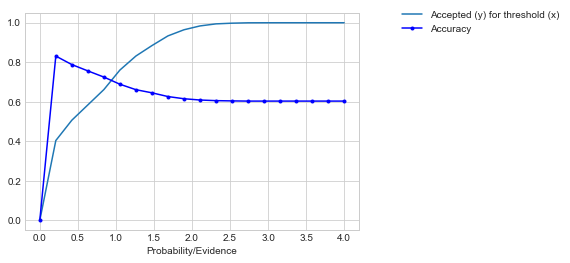

-----------------
rollover enabled, 3082 predictions provided
threshold 0.78322524
max 2.529688835144043


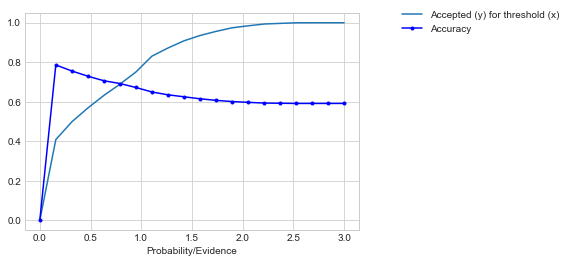

-----------------
rollover enabled, 962 predictions provided
threshold 0.7063221
max 2.639347553253174


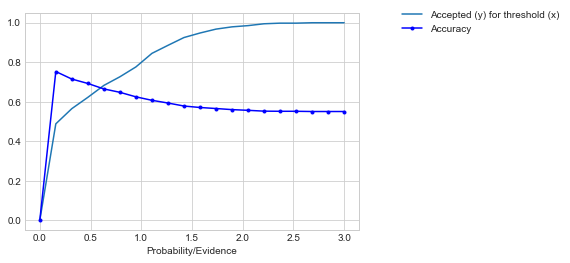

-----------------
rollover enabled, 284 predictions provided
threshold 0
max 2.812450885772705


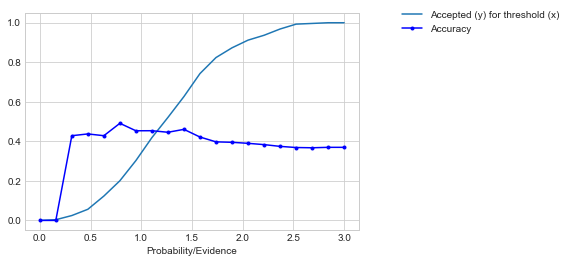

-----------------
thresholds [0.91635054, 0.78322524, 0.7063221, 0]
input_predictions [9984, 3082, 962, 284]
Accepted_list [6902, 2120, 678, 0]
Acceptance_correct [4943, 1468, 444, 0]
overall Accuracy 0.7067010309278351
branch_cost [120393449540, 62369814880, 73369944246, 0]
base cost:  256133208666  total cost: 1093178728600
cost difference:  0.23430131044904418


In [8]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    threshold = mean
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = 0
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] <= threshold)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] > threshold)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [9]:
test_set = brevis.dataset.prepare.test_set(tf.keras.datasets.cifar100.load_data(label_mode="fine"),32,(227,227),include_targets=False,num_outputs = 100)

targetsis : False


In [37]:
noisy_test_set = tf.data.Dataset.sample_from_datasets([test_ds,test_set],weights=[.5,.5])
noisy_test_set

<_DirectedInterleaveDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, None), dtype=tf.float32, name=None))>

In [10]:
outputs = getPredictions(model,test_set,50)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
dense_2/Softmax:0 312


,x,y,probs,testy
0,2,49,0.024776,0
1,4,33,0.744885,0
2,4,72,0.208169,0
3,6,51,2.927020,0
4,8,71,0.099316,0
...,...,...,...,...
1627,8,41,1.268267,0
1628,2,16,0.479443,0
1629,4,40,0.057530,0
1630,3,54,1.699210,0


branch_softmax/Softmax:0


,x,y,probs,testy
0,2,49,0.742934,0
1,4,33,0.012428,0
2,2,72,0.986929,0
3,6,51,1.581494,0
4,0,71,0.631449,0
...,...,...,...,...
1627,8,41,0.552598,0
1628,4,16,1.915053,0
1629,3,40,1.475147,0
1630,9,54,0.731968,0


branch_softmax_1/Softmax:0


,x,y,probs,testy
0,0,49,1.311447,0
1,4,33,0.038734,0
2,4,72,1.084467,0
3,6,51,0.605275,0
4,0,71,0.221258,0
...,...,...,...,...
1627,4,41,1.683336,0
1628,3,16,1.155301,0
1629,9,40,2.352670,0
1630,8,54,2.461301,0


branch_softmax_2/Softmax:0


,x,y,probs,testy
0,2,49,0.000204,0
1,4,33,0.312398,0
2,4,72,0.098330,0
3,9,51,2.520669,0
4,4,71,0.839009,0
...,...,...,...,...
1627,4,41,0.419406,0
1628,2,16,0.013682,0
1629,4,40,0.005535,0
1630,3,54,0.962522,0


In [11]:
for predictions in outputs: 
    outliers = predictions.loc[(predictions['y'] > 9)]
    print(outliers)
    print(len(outliers)/len(predictions))

      x   y     probs testy
0     2  49  0.024776     0
1     4  33  0.744885     0
2     4  72  0.208169     0
3     6  51  2.927020     0
4     8  71  0.099316     0
...  ..  ..       ...   ...
1627  8  41  1.268267     0
1628  2  16  0.479443     0
1629  4  40  0.057530     0
1630  3  54  1.699210     0
1631  9  70  0.051438     0

[1459 rows x 4 columns]
0.8939950980392157
      x   y     probs testy
0     2  49  0.742934     0
1     4  33  0.012428     0
2     2  72  0.986929     0
3     6  51  1.581494     0
4     0  71  0.631449     0
...  ..  ..       ...   ...
1627  8  41  0.552598     0
1628  4  16  1.915053     0
1629  3  40  1.475147     0
1630  9  54  0.731968     0
1631  2  70  0.745983     0

[1459 rows x 4 columns]
0.8939950980392157
      x   y     probs testy
0     0  49  1.311447     0
1     4  33  0.038734     0
2     4  72  1.084467     0
3     6  51  0.605275     0
4     0  71  0.221258     0
...  ..  ..       ...   ...
1627  4  41  1.683336     0
1628  3  16  1.1

threshold 0.91635054
accepted outliers 0.5346127484578478
max 3.0180764198303223


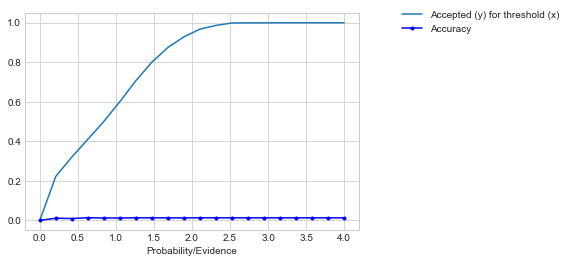

-----------------
rollover enabled, 765 predictions provided
threshold 0.78322524
accepted outliers 0.5625920471281296
max 2.4302151203155518


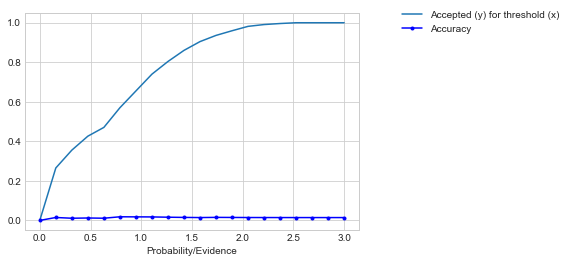

-----------------
rollover enabled, 332 predictions provided
threshold 0.7063221
accepted outliers 0.569023569023569
max 2.5297372341156006


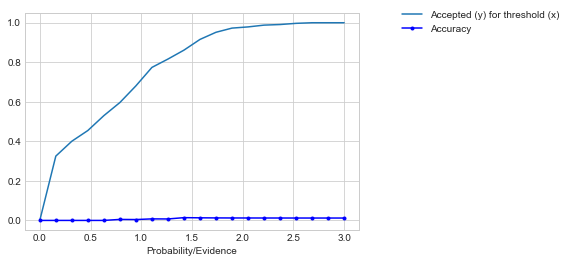

-----------------
rollover enabled, 145 predictions provided
threshold 2.6134533882141113
accepted outliers 1.0
max 2.6134533882141113


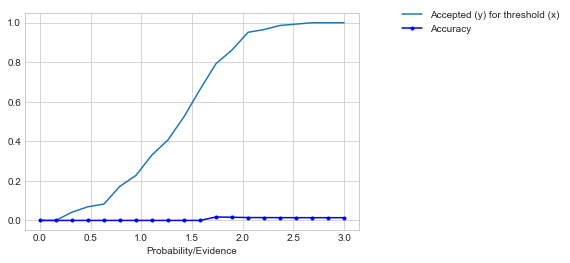

-----------------
thresholds [0.91635054, 0.78322524, 0.7063221, 0, 0.91635054, 0.78322524, 0.7063221, 2.6134533882141113]
input_predictions [1632, 765, 332, 145]
Accepted_list [867, 433, 187, 145]
Acceptance_correct [11, 7, 0, 2]
overall Accuracy 0.012254901960784314
branch_cost [15123315090, 12738740492, 20236253059, 20568483595]
base cost:  68666792236  total cost: 183924503616
cost difference:  0.3733422729761089


In [12]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
# Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    # threshold = mean
    threshold = Thresholds[i]
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = max(output['probs'])
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] <= threshold)]
    Accepted_outliers = Accepted.loc[(Accepted['y']>9)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] > threshold)]
    Rejected_outliers = Rejected.loc[(Rejected['y']>9)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    # print(Accepted_outliers)
    print("accepted outliers",len(Accepted_outliers)/(len(Accepted_outliers)+len(Rejected_outliers)))
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [ ]:
1015303831542
120020480229  